Minimum steps required: 13
Coordinate of the path: [(0, 0), (2, 1), (4, 0), (3, 2), (5, 1), (7, 0), (6, 2), (8, 1), (7, 3), (8, 5), (9, 3), (8, 1), (6, 0), (5, 2)]


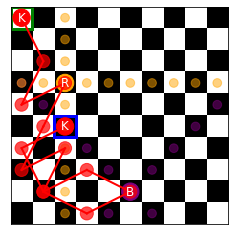

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from collections import deque

class Cell:
    def __init__(self, x=0, y=0, dist=0, parent=None):
        self.x = x
        self.y = y
        self.dist = dist
        self.parent = parent

def Chessboard(n):
    base_row = np.tile([1, 0], (n + 1) // 2)[:n]
    board = np.tile(base_row, (n, 1))
    for i in range(n):
        if i % 2 != 0:
            board[i] = np.roll(board[i], 1)
    return board

def plot_chessboard(ax, board):
    ax.imshow(board, cmap='gray', interpolation='nearest')
    ax.set_xticks([])
    ax.set_yticks([])

def plot_piece(ax, position, color, label):
    ax.add_patch(patches.Circle((position[1], position[0]), 0.4, color=color, fill=True))
    ax.text(position[1], position[0], label, color='white', fontsize=12, ha='center', va='center')

def plot_square(ax, position, color, linewidth):
    ax.add_patch(patches.Rectangle((position[1] - 0.5, position[0] - 0.5), 1, 1, edgecolor=color, facecolor='none', lw=linewidth))

# Funzione per visualizzare le caselle minacciate
def plot_threatened_squares(ax, n, bishopRow, bishopCol, rookRow, rookCol):
    if bishopRow < n and bishopCol < n:
        for i in range(n):
            for j in range(n):
                if abs(bishopRow - i) == abs(bishopCol - j) and (i != bishopRow or j != bishopCol):
                    ax.add_patch(patches.Circle((j, i), 0.2, color='purple', fill=True, alpha=0.5))

    if rookRow < n and rookCol < n:
        for i in range(n):
            if i != rookRow:
                ax.add_patch(patches.Circle((rookCol, i), 0.2, color='orange', fill=True, alpha=0.5))
            if i != rookCol:
                ax.add_patch(patches.Circle((i, rookRow), 0.2, color='orange', fill=True, alpha=0.5))    
    
def is_inside(x, y, n):
    return 0 <= x < n and 0 <= y < n

def isBishopAlive(n, bishopRow, bishopCol):
    if bishopRow < n and bishopCol < n:
        return True
    else:
        return False
    
def isRookAlive(n, rookRow, rookCol):
    if rookRow < n and rookCol < n:
        return True
    else:
        return False

def moves(n, startRow, startCol, endRow, endCol, bishopRow, bishopCol, rookRow, rookCol):
    if startRow == endRow and startCol == endCol:  # Caso banale
        return 0, [(startRow, startCol)]
    
    moves = ((2,1), (1,2), (-1,2), (-2,1), (-2,-1), (-1,-2), (1,-2), (2,-1))
    stack = [(startRow, startCol, True, True, 0, [(startRow, startCol)])]  # Usare uno stack anziché una coda
    visited = set([(startRow, startCol, True, True)])  # Impostare come visitato
    
    while stack:
        i, j, alive_bishop, alive_rook, steps, path = stack.pop()  # Usare pop per DFS        
        for di, dj in moves:
            cr = i + di
            cc = j + dj
            
            # Aggiornare lo stato di vita solo per il percorso corrente
            stillalive_bishop = alive_bishop and (cr != bishopRow or cc != bishopCol)
            stillalive_rook = alive_rook and (cr != rookRow or cc != rookCol)
            
            if 0 <= cr < n and 0 <= cc < n and (cr, cc, stillalive_bishop, stillalive_rook) not in visited and (
                    not stillalive_bishop or abs(cr - bishopRow) != abs(cc - bishopCol)) and (
                    not stillalive_rook or (cr != rookRow and cc != rookCol)):
                
                if cr == endRow and cc == endCol:
                    return steps + 1, path + [(cr, cc)]
                
                pathnew = path + [(cr, cc)]
                stack.append((cr, cc, stillalive_bishop, stillalive_rook, steps + 1, pathnew))
                visited.add((cr, cc, stillalive_bishop, stillalive_rook))    
    return -1, None

def draw_path(ax, path):
    for (i, j) in path:
        ax.add_patch(patches.Circle((j, i), 0.3, color='red', fill=True, alpha=0.7))
    for k in range(len(path) - 1):
        (i1, j1), (i2, j2) = path[k], path[k + 1]
        ax.plot([j1, j2], [i1, i2], color='red', linewidth=2)

# Configurazione e visualizzazione della scacchiera e dei pezzi
n = 10
startRow, startCol = 0, 0
endRow, endCol = 5, 2
bishopRow, bishopCol = 8, 5
rookRow, rookCol = 3, 2

board = Chessboard(n)
fig, ax = plt.subplots()
plot_chessboard(ax, board)
plot_square(ax, (startRow, startCol), 'green', 3)
plot_square(ax, (endRow, endCol), 'blue', 3)
plot_piece(ax, (startRow, startCol), 'red', 'K')
plot_piece(ax, (bishopRow, bishopCol), 'purple', 'B')
plot_piece(ax, (rookRow, rookCol), 'orange', 'R')
plot_piece(ax, (endRow, endCol), 'red', 'K')
plot_threatened_squares(ax, n, bishopRow, bishopCol, rookRow, rookCol)


result = moves(n, startRow, startCol, endRow, endCol, bishopRow, bishopCol, rookRow, rookCol)
if result[0] != -1:
    steps, path = result
    draw_path(ax, path)
    print(f"Minimum steps required: {steps}")
    print("Coordinate of the path:", path)
else:
    print("No path found to reach the target.")

plt.show()

**BFS (Breadth-First Search)**  
*1. Description:* BFS explores all nodes at one level before moving to the next level. It uses a queue (FIFO) to keep track of nodes to be explored.  
*2. Characteristics:*  
Shortest Path Search: BFS is optimal for finding the shortest path in an unweighted graph because it explores nodes level by level.  
Space Complexity: It can require a lot of memory because it keeps all nodes at each level in the queue.  
Results in your case: In the BFS image (second image), we see that it found a path with 9 steps. Since BFS explores all possible paths at the current level before moving to the next, it guarantees finding the shortest path.  

**DFS (Depth-First Search)**  
*1. Description:* DFS explores as far as possible along each branch before backtracking. It uses a stack (LIFO) to keep track of nodes to be explored.  
*2. Characteristics:*  
Not Optimal for Shortest Path: DFS does not guarantee finding the shortest path because it may explore a long path before discovering a shorter one.  
Space Complexity: Generally requires less memory than BFS since it does not keep all nodes at each level.  
Results in your case: In the DFS image (first image), we see that it found a path with 13 steps. This does not mean it is the shortest possible path, but it is the first path that DFS found reaching the destination.  

In summary, BFS is more suitable for finding the shortest path in an unweighted graph, while DFS can be faster in terms of execution time for finding a path, but not necessarily the shortest one.